<a href="https://colab.research.google.com/github/trehansalil/toxicity_detection/blob/main/experimental_work_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'jigsaw-toxic-comment-classification-challenge:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-competitions-data%2Fkaggle-v2%2F8076%2F44219%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240421%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240421T030205Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D7c0a9ff1a5a504bf4bb9fa94d767287031a6b8b8f10de3de2dc4f47037516bc4c929fab7f00e07134deeca13e592e7e555137e1a5587603058dc338757390becb1f52f3e4f04d8825b833bb3e6f3d381167eabcc2bb12e309a494bdfaf22ddc9d63ce07a8f22180c528dd395044dc48b09399241c7a9a47fdf247b1025274e41ef99fe89bed2d857ed4d99a65bec953c868d7f21b93703c007ea236d9efea056b121b9fac20c8f2684ad584954db42a45a3596b7139fc8c6e9c4cf6a1ff662e66f06a3f8076de146da5e8ddd27e3f2beb475aa4c54783470fdd1c24e9483286bdb642e688925f3d71bd600f9682623dc0991c1dfe3340d13a78bcc4c153a9aef,bert-base-cased:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F507677%2F938093%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240421%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240421T030205Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D731076fe00e01f96f83dab5e31f1b9033485decda4469f9ff1590a059f37b3ee49f812d7fa31144b8bb89cc9d65dd253cef273b242e8aaef221e9615f9eaf80188532b9e62ca7602145e20badc1e1e27748ace164409e9c4925cd7128658ea484c5641646111df3ac558beee5fd083d5262e5e0795150848d38a90dc2c3406fbcccbc4e3267beb8f7319a89d8327e36151bf023c4eb5bc31db0e5506455e18717a4d31c3c47624dbd0a7d1e8488672bce8fa1e530ec3e212c4e3f457e7e16dd07478264abe698ee7daaf9a0cdaf5beb15cdb1557a37c1b15b12e478acdd445193722b1e8f23d9f9a7af06ee8cf7dc8af1fe3e4bef8b11efe9a8592f6ce855ef8'

KAGGLE_INPUT_PATH=os.getcwd()+'/kaggle/input'
KAGGLE_WORKING_PATH=os.getcwd()+'/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 55201987 bytes downloaded
Downloaded and uncompressed: jigsaw-toxic-comment-classification-challenge
[==================================================] 404510591 bytes downloaded
Downloaded and uncompressed: bert-base-cased
Data source import complete.


## Toxic Comment Classification

## Intro
I am quite new in the field of data science and specially transformers are a very new concept to me. During my exploration for learning more about BERT, I noticed most of the material present on kaggle either discuss the underlying logics and modules in BERT model, (which is necessary for begginers) or they present blocks of code without much details. This material is an attempt to bridge the gap from the very basics and theory of BERT model to practicality of a simple model. <br>
A lot of the work in this notebook is inspired by the work of [chumajin](https://www.kaggle.com/chumajin) from [this notebook](https://www.kaggle.com/chumajin/pytorch-bert-beginner-s-room). I would like to thank him here and would add that I have adapt it to our problem in this competetion. I have also added more visualization to see the imporvements of the models over iterations in epochs and during different folds.

### Objective
Creating a model which predicts the probability of each type of toxicity for each comment.

This notebook is presented to two parts. I have separted it in two parts, due to memory limitations in kaggle. You can run either part I or part II independantly. <br>
In **part I** I try to explain the primary steps we need to take for handling similar tasks, for binary classification of different labels. The model in this part runs only for one distribuation of train set and validation set. and you can see the inital performance results(auc score) we get from this model. <br>
In **part II**, I have braught all the necessary blocks of code from part I and then show how 5 models can be developed for different choices of train set and validation set as in k_fold (k = 5). The probablites for all types of toxicity for each comment is then estimated as mean value from these 5 models.



### Parameters affecting simulation time
For running this noteboook quickly, to see how it works, in both part I and part II, you can reduce the training set to the limited number of rows. I took 200 rows in part I and 2000 in part II.<br>
The reason for having it very low in part I is that the code opts for eductional resons rather than being efficient. Therefore, it reads in many different variables and cause the cuda memory crash if we go for more than 200 rows. This gives us an unimpressive results for part I. (accuracy 86%) <br>
In part II, code is more consice compared to part I, and it's possible to raise number of rows to include the whole training set. However, I keep it limited to 2000, so you manage to get a fairly good result (94% accuracy and 0.988 auc score) in 22 min of simulation. <br>
You can have (epochs = 5, k = 5) and see how the accuracy and losses imporve in different epochs. The accuracy and loss are in an acceptable range, as this notebook is not concerned about reaching the state-of-art results. <br>

Hope that you find it useful and if so, please don't forget to upvote this note book, it makes my day! :-)

## PART I
## 1. Prepare the data
### a. Loading libraries

In [3]:
# !pip install mlflow
!pip install lightning mlflow pandas seaborn torch transformers

In [4]:
import numpy as np
import pandas as pd
import os
import random
import time
import lightning as L

import re
import string
import nltk
from nltk.corpus import stopwords

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", context="talk")
plt.style.use('dark_background')

from tqdm import tqdm

import torch
import torch.nn as nn
import torch.nn.functional as func
from torch.utils.data import DataLoader, Dataset

import transformers
from transformers import AdamW, get_linear_schedule_with_warmup

import mlflow.pytorch
from mlflow import MlflowClient
from mlflow.models import infer_signature

import tokenizers
from lightning.pytorch.callbacks import (
    EarlyStopping,
    LearningRateMonitor,
    ModelCheckpoint,
)
from lightning.pytorch.cli import LightningCLI

from sklearn.metrics import mean_squared_error, roc_auc_score, roc_curve, auc, accuracy_score

import warnings
warnings.simplefilter('ignore')

We set a seed for reproducability of the results.

In [5]:
mlflow.pytorch.autolog()

2024/04/21 13:44:18 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of pytorch. If you encounter errors during autologging, try upgrading / downgrading pytorch to a supported version, or try upgrading MLflow.


In [6]:
SEED = 34

def random_seed(SEED):
    random.seed(SEED)
    os.environ['PYTHONHASHSEED'] = str(SEED)
    np.random.seed(SEED)
    torch.manual_seed(SEED)
    torch.cuda.manual_seed(SEED)
    torch.cuda.manual_seed_all(SEED)
    torch.backends.cudnn.deterministic = True

random_seed(SEED)

In [7]:
def print_auto_logged_info(r):
    tags = {k: v for k, v in r.data.tags.items() if not k.startswith("mlflow.")}
    artifacts = [f.path for f in MlflowClient().list_artifacts(r.info.run_id, "model")]
    print(f"run_id: {r.info.run_id}")
    print(f"artifacts: {artifacts}")
    print(f"params: {r.data.params}")
    print(f"metrics: {r.data.metrics}")
    print(f"tags: {tags}")

In [8]:
train = pd.read_csv('../input/jigsaw-toxic-comment-classification-challenge/train.csv.zip', nrows = 200 )
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [9]:
temp = train[train['toxic'] == 1]
temp.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
12,0005c987bdfc9d4b,Hey... what is it..\n@ | talk .\nWhat is it......,1,0,0,0,0,0
16,0007e25b2121310b,"Bye! \n\nDon't look, come or think of comming ...",1,0,0,0,0,0
42,001810bf8c45bf5f,You are gay or antisemmitian? \n\nArchangel WH...,1,0,1,0,1,1
43,00190820581d90ce,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1,0,1,0,1,0


In [10]:
print(len(train['comment_text'][10]), 'Total Characters')
train['comment_text'][10]

2875 Total Characters


'"\nFair use rationale for Image:Wonju.jpg\n\nThanks for uploading Image:Wonju.jpg. I notice the image page specifies that the image is being used under fair use but there is no explanation or rationale as to why its use in Wikipedia articles constitutes fair use. In addition to the boilerplate fair use template, you must also write out on the image description page a specific explanation or rationale for why using this image in each article is consistent with fair use.\n\nPlease go to the image description page and edit it to include a fair use rationale.\n\nIf you have uploaded other fair use media, consider checking that you have specified the fair use rationale on those pages too. You can find a list of \'image\' pages you have edited by clicking on the ""my contributions"" link (it is located at the very top of any Wikipedia page when you are logged in), and then selecting ""Image"" from the dropdown box. Note that any fair use images uploaded after 4 May, 2006, and lacking such a

A comment can be toxic, severe_toxic, obscene and insult at the same time. So the class for each comment is not limited to one.
<br>Now let's check the values for each column in train dataset.

In [11]:
labels = train.drop(['id', 'comment_text'], axis = 1)
unique_values = lambda x: train[x].unique()
[unique_values(col) for col in labels.columns.tolist()]

[array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1])]

In [12]:
test = pd.read_csv('../input/jigsaw-toxic-comment-classification-challenge/test.csv.zip', nrows = 100)
test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [13]:
test_labels = pd.read_csv('../input/jigsaw-toxic-comment-classification-challenge/test_labels.csv.zip', nrows = 10)
test_labels.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,-1,-1,-1,-1,-1,-1
1,0000247867823ef7,-1,-1,-1,-1,-1,-1
2,00013b17ad220c46,-1,-1,-1,-1,-1,-1
3,00017563c3f7919a,-1,-1,-1,-1,-1,-1
4,00017695ad8997eb,-1,-1,-1,-1,-1,-1


In [14]:
submission = pd.read_csv('../input/jigsaw-toxic-comment-classification-challenge/sample_submission.csv.zip', nrows = 10)
submission.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.5,0.5,0.5,0.5,0.5,0.5
1,0000247867823ef7,0.5,0.5,0.5,0.5,0.5,0.5
2,00013b17ad220c46,0.5,0.5,0.5,0.5,0.5,0.5
3,00017563c3f7919a,0.5,0.5,0.5,0.5,0.5,0.5
4,00017695ad8997eb,0.5,0.5,0.5,0.5,0.5,0.5


## 2. Summerize data
### a. Descriptive statistics
### Missing values

In [15]:
train.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [16]:
test.isnull().sum()

id              0
comment_text    0
dtype: int64

Great! we have no missing value!
### Distribution of each class in the train set and test labels
Let's check how many of each category is found in our training data:

In [17]:
df_train = train.drop(['id', 'comment_text'], axis = 1)
label_counts = df_train.sum()
df_counts = pd.DataFrame(label_counts)
df_counts.rename(columns = {0:'counts'}, inplace = True)
df_counts = df_counts.sort_values('counts', ascending = False)
df_counts

,counts
toxic,20
insult,12
obscene,11
severe_toxic,3
identity_hate,3
threat,2


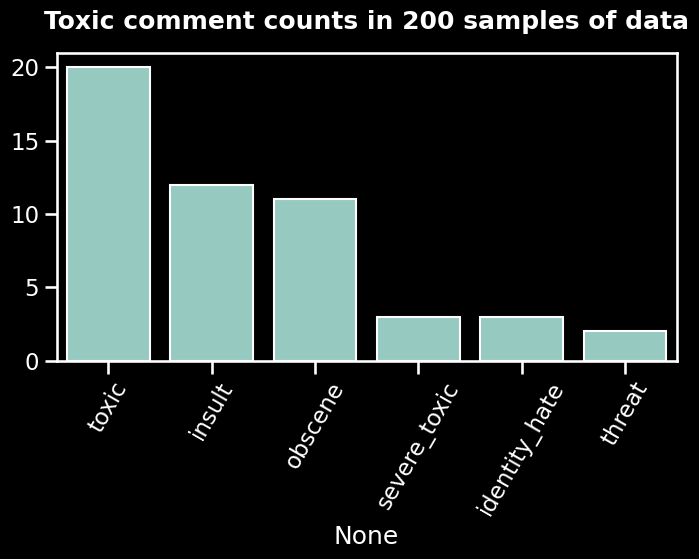

In [22]:
fig, ax = plt.subplots(figsize = (8,4))
p = sns.barplot(x=df_counts.index, y=df_counts['counts'])
x = plt.xticks(rotation = 60)
ax.set_title('Toxic comment counts in '+ str(len(df_train))+ ' samples of data', weight = 'bold', fontsize = 18, y = 1.05)
x = ax.set_ylabel('')

Relative percentage gives us a better understanding.

In [23]:
labels = np.round(df_train.sum()/len(df_train)*100, 1)
labels

toxic            10.0
severe_toxic      1.5
obscene           5.5
threat            1.0
insult            6.0
identity_hate     1.5
dtype: float64

In [24]:
df_test_labels = test_labels.drop(['id'], axis = 1)
count_values = lambda x: np.round(df_test_labels[x].value_counts(normalize = True)*100, 1)
pd.DataFrame([count_values(col) for col in df_test_labels.columns.tolist()])

,-1,0
proportion,80.0,20.0
proportion,80.0,20.0
proportion,80.0,20.0
proportion,80.0,20.0
proportion,80.0,20.0
proportion,80.0,20.0


In [25]:
train.shape, test.shape

((200, 8), (100, 2))

## 3. Prepare Data
### a. Data cleaning
We need to clean, tokenize and convert the data to tensors. <br>
The function below helps us with:

- Removing hyperlinks, punctuation and numbers
- Tokenizeation

We skip changing it all to lower case and keep the letters sensetive to case. The comment BAD!! has stronger negative emotion in it than bad!! <br>
We also do not remove the stop words, Since with contextual models such as BERT and ROBERTA it is (almost) always better not to process the texts removing stopwords. These models are pretrained with stopwords: if you remove stop words your model may lose the context. This is also true for stemming and lemmatization preprocessing techniques. So we skip them too!

In [26]:
# text preprocessing helper functions [1]

def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    #text = text.lower()

    #pattern = [zero or more character]
    text = re.sub('\[.*?\]', '', text)

    #pattern = with or without(http),://, one or more non-white space character, OR www, .,one or more non-white space character
    text = re.sub('https?://\S+|www\.\S+', '', text)

    #pattern = <, zero or more characters, >, (one or more occurance of >)
    text = re.sub('<.*?>+', '', text)

    #pattern = any punctionation
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)

    #pattern = any new line
    text = re.sub('\n', '', text)

    #pattern = any from[a-zA-Z0-9_], any from[0-9], any from [a-zA-Z0-9_]
    text = re.sub('\w*\d\w*', '', text)
    return text

In [27]:
%%time
train['clean_text'] = train['comment_text'].apply(str).apply(lambda x: clean_text(x))
test['clean_text'] = test['comment_text'].apply(str).apply(lambda x: clean_text(x))

CPU times: user 18.8 ms, sys: 0 ns, total: 18.8 ms
Wall time: 18.5 ms


### b. Dataset and Dataloader
We use 20% of the training data as validation set.

In [28]:
kfold = 5
train['kfold'] = train.index % kfold
train.index % kfold

Index([0, 1, 2, 3, 4, 0, 1, 2, 3, 4,
       ...
       0, 1, 2, 3, 4, 0, 1, 2, 3, 4],
      dtype='int64', length=200)

In [29]:
#reset_index creates a column with the name of 'index' and saves the old index values in it and updates the values of index.
#drop = True removes the column 'index' with the old index values.
p_train = train[train["kfold"] != 0].reset_index(drop = True)
p_valid = train[train["kfold"] == 0].reset_index(drop = True)

In [30]:
p_train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean_text,kfold
0,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,Daww He matches this background colour Im seem...,1
1,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,Hey man Im really not trying to edit war Its j...,2
2,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,MoreI cant make any real suggestions on improv...,3
3,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,You sir are my hero Any chance you remember wh...,4
4,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1


In [31]:
tokenizer = transformers.BertTokenizer.from_pretrained('bert-base-cased')

In [32]:
%%time
senten_len = []
for sentence in tqdm(p_train['clean_text']):
    token_words = tokenizer.encode_plus(sentence)['input_ids']
    senten_len.append(len(token_words))

100%|██████████| 160/160 [00:00<00:00, 1033.83it/s]

CPU times: user 160 ms, sys: 0 ns, total: 160 ms
Wall time: 158 ms


We'll have a look at the distribution of the length for tokenized comments to have an intuation about what to set as max_length for our tokenized comments.

Text(0.5, 0, 'Tocken count')

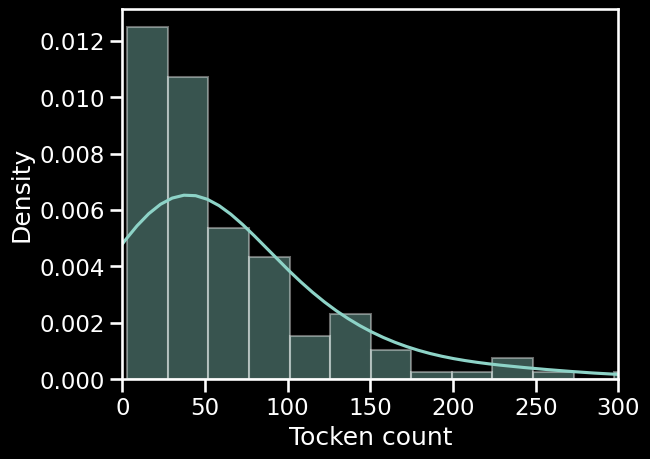

In [33]:
sns.distplot(senten_len)
plt.xlim([0, 300])
plt.xlabel('Tocken count')

It seems that 200 is good size move on with.

In [34]:
max_len = 200

We define a class BertDataSet with Dataset as super class and overwirte the__init_, __ len__ and __ getitem__ function in it. It will get the comment list and relevant toxic labels (6 labels in this case) and creates token ids and attention mask to distinguish the comments from the zero padding.

**torch.tensor vs np.ndarray:** <br>
If you are only interested in efficient and easy way to perform mathematical operations on matrices np.ndarray or torch.tensor can be used interchangeably.

However, torch.tensors are designed to be used in the context of gradient descent optimization, and therefore they hold not only a tensor with numeric values, but (and more importantly) the computational graph leading to these values. This computational graph is then used (using the chain rule of derivatives) to compute the derivative of the loss function w.r.t each of the independent variables used to compute the loss.

As mentioned before, np.ndarray object does not have this extra "computational graph" layer and therefore, when converting a torch.tensor to np.ndarray you must explicitly remove the computational graph of the tensor using the detach() command.

In [35]:
class BertDataSet(Dataset):

    def __init__(self, sentences, toxic_labels):
        self.sentences = sentences
        #target is a matrix with shape [#1 x #6(toxic, obscene, etc)]
        self.targets = toxic_labels.to_numpy()

    def __len__(self):
        return len(self.sentences)


    def __getitem__(self, idx):
        sentence = self.sentences[idx]
        bert_senten = tokenizer.encode_plus(sentence,
                                            add_special_tokens = True, # [CLS],[SEP]
                                            max_length = max_len,
                                            pad_to_max_length = True,
                                            truncation = True,
                                            return_attention_mask = True
                                             )
        ids = torch.tensor(bert_senten['input_ids'], dtype = torch.long)
        mask = torch.tensor(bert_senten['attention_mask'], dtype = torch.long)
        toxic_label = torch.tensor(self.targets[idx], dtype = torch.float)


        return {
            'ids' : ids,
            'mask' : mask,
            'toxic_label':toxic_label
        }

In [36]:
train_dataset = BertDataSet(p_train['clean_text'], p_train[['toxic', 'severe_toxic','obscene', 'threat', 'insult','identity_hate']])
valid_dataset = BertDataSet(p_valid['clean_text'], p_valid[['toxic', 'severe_toxic','obscene', 'threat', 'insult','identity_hate']])

Let's have a look what's inside a dataset:

In [37]:
for a in train_dataset:
    print(a)
    break

{'ids': tensor([  101, 10136,  2246,  2246,  1124,  2697,  1142,  3582,  5922,   146,
         1306,  9321,  5342,  1114,  5749,  2037,  1356, 11390,   102,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,

Now we set the batch-size for trainig set and validation set. The bigger batch size helps to speed up the computations. However, the results confirm that using small batch sizes achieves the best generalization performance, for a given computation cost. In all cases, the best results have been obtained with batch sizes of 32 or smaller. Often mini-batch sizes as small as 2 or 4 deliver optimal results.

In [38]:
train_batch = 32
valid_batch = 32

In the code below pin_memory = True to a DataLoader will automatically put the fetched data Tensors in pinned memory,
and thus enables faster data transfer to CUDA-enabled GPUs. This is best explained in the [NVIDIA blogpost](https://developer.nvidia.com/blog/how-optimize-data-transfers-cuda-cc/). I will borrow the picture from it.<br>
num_workers as a positive integer will turn on multi-process data loading with the specified number of loader worker processesm

In [39]:
train_dataloader = DataLoader(train_dataset, batch_size = train_batch, pin_memory = True, num_workers = 4, shuffle = True)
valid_dataloader = DataLoader(valid_dataset, batch_size = valid_batch, pin_memory = True, num_workers = 4, shuffle = False)

Here we can check inside the dataloader:

In [40]:
%%time
for a in train_dataloader:
    print(a)
    print('id shape in data laoder is',a['ids'].shape)
    break

{'ids': tensor([[  101,  1192,  1169,  ...,     0,     0,     0],
        [  101,  1573,  2158,  ...,     0,     0,     0],
        [  101, 20173,  4960,  ...,     0,     0,     0],
        ...,
        [  101,  8790, 16409,  ...,     0,     0,     0],
        [  101, 19585, 26918,  ...,  1132,  7173,   102],
        [  101,  2181,  1122,  ...,  1775,  3118,   102]]), 'mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'toxic_label': tensor([[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [1., 1., 1., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 

## 4. BERT Modeling
For faster computation, let's set the device cuda if it is available.

In [41]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [42]:
%%time
model = transformers.BertForSequenceClassification.from_pretrained('bert-base-cased', num_labels = 6)
model.to(device)
model.train()

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


CPU times: user 1.01 s, sys: 418 ms, total: 1.43 s
Wall time: 3.75 s


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(28996, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

The model makes use of id and mask from token encoding in the trian set. At this state, there is no need to feed in the model with the target values such as toxic, obscene, etc.

In [43]:
%%time
for a in train_dataloader:
    ids = a['ids'].to(device)
    mask = a['mask'].to(device)
    output = model(ids, mask)
    break

CPU times: user 666 ms, sys: 288 ms, total: 954 ms
Wall time: 1.33 s


In [44]:
output

SequenceClassifierOutput(loss=None, logits=tensor([[ 0.6201,  0.3799,  0.0088, -0.8336,  0.2145, -0.5161],
        [ 0.8190,  0.4579,  0.2887, -0.3587, -0.2714,  0.1258],
        [ 0.9700,  0.5686,  0.3072, -0.9768, -0.0214, -0.4319],
        [ 0.7765,  0.2486,  0.2971, -0.7248,  0.1783, -0.3984],
        [ 0.7304,  0.3624,  0.2050, -0.6024, -0.5802, -0.1800],
        [ 0.6637,  0.1913,  0.3300, -0.4961, -0.4681, -0.0583],
        [ 0.8843,  0.5079,  0.4728, -0.7067, -0.0378, -0.3186],
        [ 0.6311,  0.5549,  0.2440, -0.7413, -0.1938, -0.1578],
        [ 0.7719,  0.5879,  0.3470, -0.3304, -0.0791, -0.1486],
        [ 0.4252,  0.0685,  0.3280, -0.5279, -0.3920, -0.2404],
        [ 0.5367,  0.5440,  0.3190, -0.3503, -0.2941, -0.2202],
        [ 0.5424,  0.1352,  0.2504, -0.5285, -0.2658,  0.0184],
        [ 0.6613,  0.3339,  0.5750, -0.5271, -0.2497, -0.4539],
        [ 0.6295,  0.4356,  0.2797, -0.3720, -0.0551, -0.0872],
        [ 0.5868,  0.5642,  0.3535, -0.9036, -0.3028, -0.2602

To get the output probabilities, we should use sigmoid function. This can be done either in the model or like here be applied to the output from model. I was first making the mistake and used softmax function. However, in our case a comment can be classified as toxic, obscene and insult at the same time. Hence it's not a multi-classficationm and therefore, this is not applicable. <br>
Here is the summary of differences between softmax function and sigmoid funciton. <br>

**Softmax funciton:**<br>
- Used for Multi-classification in the Logistics Regression model
- The probabilities sum will be 1<br>

**Sigmoid funciton:**
- Used for Binary Classification in the Logistic Regression model
- The probabilities sum does not need to be 1

To learn more about them you can read this: https://medium.com/arteos-ai/the-differences-between-sigmoid-and-softmax-activation-function-12adee8cf322

In [45]:
func.softmax(output['logits'], dim = 1)

tensor([[0.2816, 0.2215, 0.1528, 0.0658, 0.1877, 0.0904],
        [0.2916, 0.2032, 0.1716, 0.0898, 0.0980, 0.1458],
        [0.3396, 0.2273, 0.1750, 0.0485, 0.1260, 0.0836],
        [0.3039, 0.1793, 0.1882, 0.0677, 0.1671, 0.0939],
        [0.3106, 0.2150, 0.1837, 0.0819, 0.0838, 0.1250],
        [0.2889, 0.1801, 0.2069, 0.0906, 0.0932, 0.1403],
        [0.3076, 0.2111, 0.2039, 0.0627, 0.1223, 0.0924],
        [0.2665, 0.2470, 0.1810, 0.0676, 0.1168, 0.1211],
        [0.2745, 0.2283, 0.1795, 0.0912, 0.1172, 0.1093],
        [0.2533, 0.1773, 0.2298, 0.0976, 0.1119, 0.1302],
        [0.2422, 0.2440, 0.1948, 0.0998, 0.1055, 0.1136],
        [0.2637, 0.1755, 0.1969, 0.0904, 0.1175, 0.1561],
        [0.2723, 0.1963, 0.2498, 0.0830, 0.1095, 0.0893],
        [0.2572, 0.2118, 0.1813, 0.0945, 0.1297, 0.1256],
        [0.2608, 0.2550, 0.2065, 0.0588, 0.1071, 0.1118],
        [0.3075, 0.1874, 0.1647, 0.0669, 0.1517, 0.1218],
        [0.2543, 0.2299, 0.2028, 0.0710, 0.1322, 0.1098],
        [0.235

In [46]:
output_probs = func.softmax(output['logits'], dim = 1)

In [47]:
torch.max(output_probs, dim = 1)

torch.return_types.max(
values=tensor([0.2816, 0.2916, 0.3396, 0.3039, 0.3106, 0.2889, 0.3076, 0.2665, 0.2745,
        0.2533, 0.2440, 0.2637, 0.2723, 0.2572, 0.2608, 0.3075, 0.2543, 0.2903,
        0.3276, 0.2963, 0.3083, 0.2853, 0.3194, 0.2394, 0.2656, 0.2651, 0.2637,
        0.3067, 0.2879, 0.2567, 0.2639, 0.3020], device='cuda:0',
       grad_fn=<MaxBackward0>),
indices=tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0'))

## 5. Functions for training and validating
### a. Setting up some parameters

In [48]:
epochs = 5
LR = 2e-5 #Learning rate
optimizer = AdamW(model.parameters(), LR, betas = (0.9, 0.999), weight_decay = 1e-2, correct_bias = False)

We use the learning rate parameter as set above for 10% of total training time. We then decrease the learning rate gradualy to zero.

In [49]:
train_steps = int((len(train) * epochs)/train_batch)
num_steps = int(train_steps * 0.1)
scheduler = get_linear_schedule_with_warmup(optimizer, num_steps, train_steps)

100%|██████████| 5/5 [00:00<00:00,  5.22it/s]


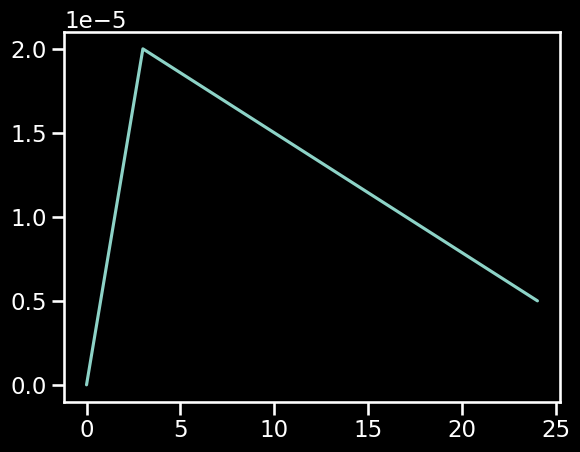

In [50]:
le = []
for b in tqdm(range(epochs)):
    for a in train_dataloader:
        le.append(scheduler.get_last_lr())
        scheduler.step()
plt.plot(np.arange(len(le)), le)

In [51]:
loss_fn = nn.BCEWithLogitsLoss()
loss_fn.to(device)

BCEWithLogitsLoss()

In [52]:
scaler = torch.cuda.amp.GradScaler()

### b. Training function
You can find more details about some keywords in this block of code below it.

In [53]:
def training(train_dataloader, model, optimizer, scheduler):
    model.train()
    torch.backends.cudnn.benchmark = True
    correct_predictions = 0

    for a in train_dataloader:
        losses = []
        optimizer.zero_grad()

        #allpreds = []
        #alltargets = []

        with torch.cuda.amp.autocast():

            ids = a['ids'].to(device, non_blocking = True)
            mask = a['mask'].to(device, non_blocking = True)

            output = model(ids, mask) #This gives model as output, however we want the values at the output
            output = output['logits'].squeeze(-1).to(torch.float32)

            output_probs = torch.sigmoid(output)
            preds = torch.where(output_probs > 0.5, 1, 0)

            toxic_label = a['toxic_label'].to(device, non_blocking = True)
            loss = loss_fn(output, toxic_label)

            losses.append(loss.item())
            #allpreds.append(output.detach().cpu().numpy())
            #alltargets.append(toxic.detach().squeeze(-1).cpu().numpy())
            correct_predictions += torch.sum(preds == toxic_label)

        scaler.scale(loss).backward() #Multiplies (‘scales’) a tensor or list of tensors by the scale factor.
                                      #Returns scaled outputs. If this instance of GradScaler is not enabled, outputs are returned unmodified.
        scaler.step(optimizer) #Returns the return value of optimizer.step(*args, **kwargs).
        scaler.update() #Updates the scale factor.If any optimizer steps were skipped the scale is multiplied by backoff_factor to reduce it.
                        #If growth_interval unskipped iterations occurred consecutively, the scale is multiplied by growth_factor to increase it
        scheduler.step() # Update learning rate schedule

    losses = np.mean(losses)
    corr_preds = correct_predictions.detach().cpu().numpy()
    accuracy = corr_preds/(len(p_train)*6)

    return losses, accuracy

**amp** stands for automatic mixed precision. <br>
To learn more about the **autocast** read this link: <br>
https://pytorch.org/docs/stable/amp.html <br>
in short: Instances of autocast serve as context managers or decorators that allow regions of your script to run in mixed precision, where some operations use the torch.float32 (float) datatype and other operations use torch.float16 (half).
autocast should wrap only the forward pass(es) of your network, including the loss computation(s). Backward passes under autocast are not recommended. <br>
<br>
**with** statement in Python is used in exception handling to make the code cleaner and much more readable. It simplifies the management of common resources like file streams. Here is a link to learn more about it.<br>
https://www.geeksforgeeks.org/with-statement-in-python/<br>

**Non-Blocking** allows you to overlap compute and memory transfer to the GPU. Pinned Memory allows the non-blocking calls to actually be non-blocking.<br>

Why using **var.detach().cpu().numpy()** and not var.numpy() only? <br>
because we get an error. The main reason behind this choice presumably is to avoid confusing new comers. People not very familiar with requires_grad and cpu/gpu Tensors might go back and forth with numpy. For example doing pytorch -> numpy -> pytorch and backward on the last Tensor. This will backward without issue but not all the way to the first part of the code and won’t raise any error.
So the choice has been made to force the user to detach() to make sure they want to do it and it’s not a typo/other library that does this tranformation and breaks the computational graph.<br>

**optimizer.step():** it performs a parameter update based on the current gradient (stored in .grad attribute of a parameter) and the update rule. As an example, the update rule for SGD is defined here:<br>
https://github.com/pytorch/pytorch/blob/cd9b27231b51633e76e28b6a34002ab83b0660fc/torch/optim/sgd.py#L63 <br>

**loss.backward()** Calling .backward() mutiple times accumulates the gradient (by addition) for each parameter. This is why you should call optimizer.zero_grad() after each .step() call. Note that following the first .backward call, a second call is only possible after you have performed another forward pass.

### Gradient Scaling
If the forward pass for a particular op has float16 inputs, the backward pass for that op will produce float16 gradients. Gradient values with small magnitudes may not be representable in float16. These values will flush to zero (“underflow”), so the update for the corresponding parameters will be lost.<br>

To prevent underflow, “gradient scaling” multiplies the network’s loss(es) by a scale factor and invokes a backward pass on the scaled loss(es). Gradients flowing backward through the network are then scaled by the same factor. In other words, gradient values have a larger magnitude, so they don’t flush to zero.<br>

Each parameter’s gradient (.grad attribute) should be unscaled before the optimizer updates the parameters, so the scale factor does not interfere with the learning rate.<br>

**step()** carries out the following two operations:
1. Internally invokes unscale_(optimizer) (unless unscale_() was explicitly called for optimizer earlier in the iteration). As part of the unscale_(), gradients are checked for infs/NaNs.
2. If no inf/NaN gradients are found, invokes optimizer.step() using the unscaled gradients. Otherwise, optimizer.step() is skipped to avoid corrupting the params.

### c. Validating function
validating function is quite similar to training function. The difference is that there is no back-propagation and optemization for parameters in it.

In [54]:
def validating(valid_dataloader, model):

    model.eval()
    correct_predictions = 0
    all_output_probs = []

    for a in valid_dataloader:
        losses = []
        ids = a['ids'].to(device, non_blocking = True)
        mask = a['mask'].to(device, non_blocking = True)
        output = model(ids, mask)
        output = output['logits'].squeeze(-1).to(torch.float32)
        output_probs = torch.sigmoid(output)
        preds = torch.where(output_probs > 0.5, 1, 0)

        toxic_label = a['toxic_label'].to(device, non_blocking = True)
        loss = loss_fn(output, toxic_label)
        losses.append(loss.item())
        all_output_probs.extend(output_probs.detach().cpu().numpy())

        correct_predictions += torch.sum(preds == toxic_label)
        corr_preds = correct_predictions.detach().cpu().numpy()

    losses = np.mean(losses)
    corr_preds = correct_predictions.detach().cpu().numpy()
    accuracy = corr_preds/(len(p_valid)*6)

    return losses, accuracy, all_output_probs

## 6. Training the model
### a. Run training function

In [57]:
# !pip install -q dagshub
import dagshub
dagshub.init(repo_owner='trehansalil', repo_name='toxicity_detection', mlflow=True)

❗❗❗ AUTHORIZATION REQUIRED ❗❗❗

Output()



Open the following link in your browser to authorize the client:
https://dagshub.com/login/oauth/authorize?state=52643836-edcf-47e6-a046-9ff2c5839666&client_id=32b60ba385aa7cecf24046d8195a71c07dd345d9657977863b52e7748e0f0f28&middleman_request_id=e006c73e7e04b24082db653a8af6a262406e589e307b40279b8c1bfb91b21f7e




Initialized MLflow to track repo "trehansalil/toxicity_detection"

Repository trehansalil/toxicity_detection initialized!

In [58]:
%%time
with mlflow.start_run():
    best_score = 1000
    train_accs = []
    valid_accs = []
    train_losses = []
    valid_losses = []

    for eboch in tqdm(range(epochs)):

        train_loss, train_acc = training(train_dataloader, model, optimizer, scheduler)
        valid_loss, valid_acc, valid_probs = validating(valid_dataloader, model)

        print('train losses: %.4f' % train_loss, 'train accuracy: %.3f' % train_acc)
        print('valid losses: %.4f' % valid_loss, 'valid accuracy: %.3f' % valid_acc)
        train_losses.append(train_loss)
        valid_losses.append(valid_loss)
        train_accs.append(train_acc)
        valid_accs.append(valid_acc)


        if valid_loss < best_score:
            best_score = valid_loss
            print('Found a good model!')
            state = {
                'state_dict': model.state_dict(),
                'optimizer_dict': optimizer.state_dict(),
                'best_score': best_score
            }
            torch.save(state, 'best_model.pth')
        else:
            pass

  0%|          | 0/5 [00:00<?, ?it/s]

train losses: 0.6180 train accuracy: 0.610
valid losses: 0.6267 valid accuracy: 0.608
Found a good model!


 40%|████      | 2/5 [00:15<00:19,  6.62s/it]

train losses: 0.6269 train accuracy: 0.627
valid losses: 0.6267 valid accuracy: 0.608


 60%|██████    | 3/5 [00:17<00:09,  4.64s/it]

train losses: 0.6417 train accuracy: 0.616
valid losses: 0.6267 valid accuracy: 0.608


 80%|████████  | 4/5 [00:19<00:03,  3.70s/it]

train losses: 0.6238 train accuracy: 0.619
valid losses: 0.6267 valid accuracy: 0.608


100%|██████████| 5/5 [00:21<00:00,  4.37s/it]

train losses: 0.6296 train accuracy: 0.614
valid losses: 0.6267 valid accuracy: 0.608
CPU times: user 7.21 s, sys: 4.96 s, total: 12.2 s
Wall time: 22.5 s


In [59]:
mlflow.end_run()

### b. Plotting the results

Text(0.5, 0.98, 'Fold = 0')

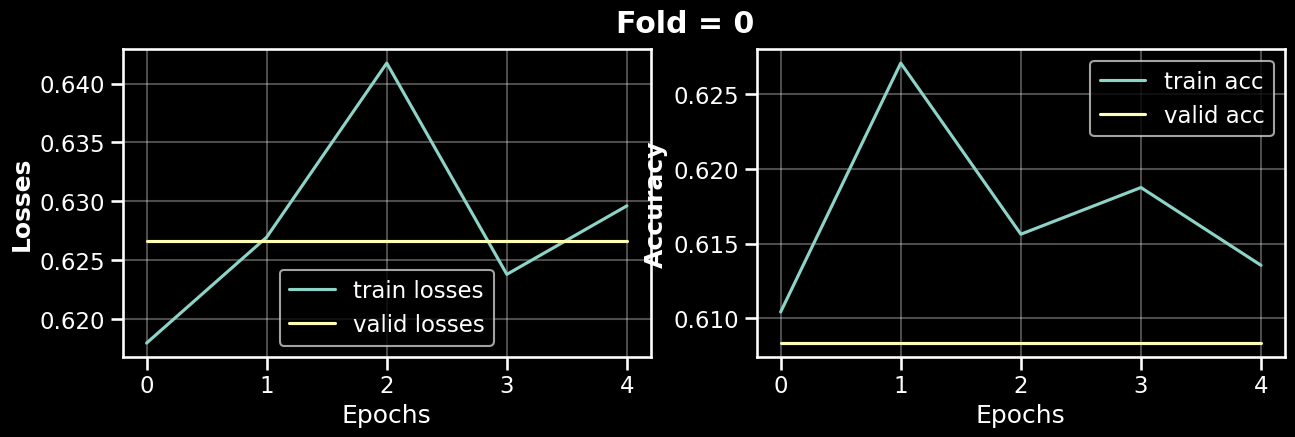

In [60]:
x = np.arange(epochs)
fig, ax = plt.subplots(1, 2, figsize = (15,4))
ax[0].plot(x, train_losses)
ax[0].plot(x, valid_losses)
ax[0].set_ylabel('Losses', weight = 'bold')
ax[0].set_xlabel('Epochs')
ax[0].grid(alpha = 0.3)
ax[0].legend(labels = ['train losses', 'valid losses'])

ax[1].plot(x, train_accs)
ax[1].plot(x, valid_accs)
ax[1].set_ylabel('Accuracy', weight = 'bold')
ax[1].set_xlabel('Epochs')
ax[1].legend(labels = ['train acc', 'valid acc'])

ax[1].grid(alpha = 0.3)
fig.suptitle('Fold = 0', weight = 'bold')


## 7. Evaluation
We use auc as a metric of evaluation in this report.

In [61]:
valid_loss, valid_acc, valid_probs = validating(valid_dataloader, model)
valid_probs = np.asarray(valid_probs).flatten()
y_valid = p_valid[['toxic', 'severe_toxic','obscene', 'threat', 'insult','identity_hate']].to_numpy().flatten()
fpr, tpr, _ = roc_curve(y_valid, valid_probs)

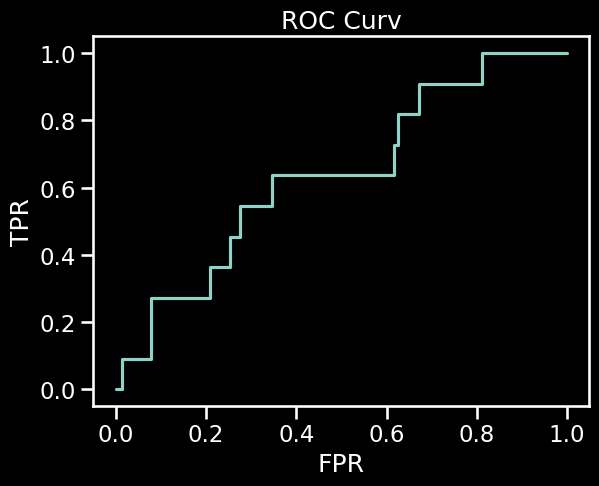

In [62]:
fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.set_title('ROC Curv')
ax.set_xlabel('FPR')
ax.set_ylabel('TPR')
plt.show()

In [63]:
auc(fpr, tpr)

0.6383485510123064

## PART II

You can start to run the notebook from here until the end. I have copied all the necessary parts from part I in this notebook. The objective here is to show how the model works for 5 different folds. epochs is set to 5 and the first 2000 rows of the trianing set is used. Feel free to change these parameters and see how it affects the accuracy.

In [67]:
import gc
obj = None

gc.collect()
torch.cuda.empty_cache()

In [1]:
%%time
import numpy as np
import pandas as pd
import os
import random
import time

import re
import string
import nltk
from nltk.corpus import stopwords

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", context="talk")
plt.style.use('dark_background')

from tqdm import tqdm

import torch
import torch.nn as nn
import torch.nn.functional as func
from torch.utils.data import DataLoader, Dataset

import mlflow.pytorch
from mlflow import MlflowClient
from mlflow.models import infer_signature

import transformers
from transformers import AdamW, get_linear_schedule_with_warmup

import tokenizers
from sklearn.metrics import mean_squared_error, roc_auc_score, roc_curve, auc

import warnings
warnings.simplefilter('ignore')

train = pd.read_csv('../input/jigsaw-toxic-comment-classification-challenge/train.csv.zip', nrows = 2000)
test = pd.read_csv('../input/jigsaw-toxic-comment-classification-challenge/test.csv.zip', nrows = 100)
submission = pd.read_csv('../input/jigsaw-toxic-comment-classification-challenge/sample_submission.csv.zip')

SEED = 34
def random_seed(SEED):
    random.seed(SEED)
    os.environ['PYTHONHASHSEED'] = str(SEED)
    np.random.seed(SEED)
    torch.manual_seed(SEED)
    torch.cuda.manual_seed(SEED)
    torch.cuda.manual_seed_all(SEED)
    torch.backends.cudnn.deterministic = True
random_seed(SEED)

def clean_text(text):

    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text


train['clean_text'] = train['comment_text'].apply(str).apply(lambda x: clean_text(x))
test['clean_text'] = test['comment_text'].apply(str).apply(lambda x: clean_text(x))

kfold = 5
train['kfold'] = train.index % kfold

tokenizer = transformers.BertTokenizer.from_pretrained('bert-base-cased')
max_len = 200

class BertDataSet(Dataset):

    def __init__(self, sentences, toxic_labels):
        self.sentences = sentences
        #target is a matrix with shape [#1 x #6(toxic, obscene, etc)]
        self.targets = toxic_labels.to_numpy()

    def __len__(self):
        return len(self.sentences)


    def __getitem__(self, idx):
        sentence = self.sentences[idx]
        bert_senten = tokenizer.encode_plus(sentence,
                                            add_special_tokens = True, # [CLS],[SEP]
                                            max_length = max_len,
                                            pad_to_max_length = True,
                                            truncation = True,
                                            return_attention_mask = True
                                             )
        ids = torch.tensor(bert_senten['input_ids'], dtype = torch.long)
        mask = torch.tensor(bert_senten['attention_mask'], dtype = torch.long)
        toxic_label = torch.tensor(self.targets[idx], dtype = torch.float)


        return {
            'ids' : ids,
            'mask' : mask,
            'toxic_label':toxic_label
        }

epochs = 5
train_batch = 32
valid_batch = 32
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

loss_fn = nn.BCEWithLogitsLoss()
loss_fn.to(device)
scaler = torch.cuda.amp.GradScaler()

def training(train_dataloader, model, optimizer, scheduler):
    model.train()
    torch.backends.cudnn.benchmark = True
    correct_predictions = 0

    for a in train_dataloader:
        losses = []
        optimizer.zero_grad()

        #allpreds = []
        #alltargets = []

        with torch.cuda.amp.autocast():

            ids = a['ids'].to(device, non_blocking = True)
            mask = a['mask'].to(device, non_blocking = True)

            output = model(ids, mask) #This gives model as output, however we want the values at the output
            output = output['logits'].squeeze(-1).to(torch.float32)

            output_probs = torch.sigmoid(output)
            preds = torch.where(output_probs > 0.5, 1, 0)

            toxic_label = a['toxic_label'].to(device, non_blocking = True)
            loss = loss_fn(output, toxic_label)

            losses.append(loss.item())
            #allpreds.append(output.detach().cpu().numpy())
            #alltargets.append(toxic.detach().squeeze(-1).cpu().numpy())
            correct_predictions += torch.sum(preds == toxic_label)

        scaler.scale(loss).backward() #Multiplies (‘scales’) a tensor or list of tensors by the scale factor.
                                      #Returns scaled outputs. If this instance of GradScaler is not enabled, outputs are returned unmodified.
        scaler.step(optimizer) #Returns the return value of optimizer.step(*args, **kwargs).
        scaler.update() #Updates the scale factor.If any optimizer steps were skipped the scale is multiplied by backoff_factor to reduce it.
                        #If growth_interval unskipped iterations occurred consecutively, the scale is multiplied by growth_factor to increase it
        scheduler.step() # Update learning rate schedule

    losses = np.mean(losses)
    corr_preds = correct_predictions.detach().cpu().numpy()
    accuracy = corr_preds/(len(p_train)*6)

    return losses, accuracy

def validating(valid_dataloader, model):

    model.eval()
    correct_predictions = 0
    all_output_probs = []

    for a in valid_dataloader:
        losses = []
        ids = a['ids'].to(device, non_blocking = True)
        mask = a['mask'].to(device, non_blocking = True)
        output = model(ids, mask)
        output = output['logits'].squeeze(-1).to(torch.float32)
        output_probs = torch.sigmoid(output)
        preds = torch.where(output_probs > 0.5, 1, 0)

        toxic_label = a['toxic_label'].to(device, non_blocking = True)
        loss = loss_fn(output, toxic_label)
        losses.append(loss.item())
        all_output_probs.extend(output_probs.detach().cpu().numpy())

        correct_predictions += torch.sum(preds == toxic_label)
        corr_preds = correct_predictions.detach().cpu().numpy()

    losses = np.mean(losses)
    corr_preds = correct_predictions.detach().cpu().numpy()
    accuracy = corr_preds/(len(p_valid)*6)

    return losses, accuracy, all_output_probs

CPU times: user 4.36 s, sys: 2.28 s, total: 6.64 s
Wall time: 6.14 s


## 8. Repeat training for k-fold

To improve our model we repeat the same process of training for each fold of k-folds.

In [27]:
mlflow.end_run()

Initialized MLflow to track repo "trehansalil/toxicity_detection"

Repository trehansalil/toxicity_detection initialized!

  0%|          | 0/5 [00:00<?, ?it/s]Some weights of BertForSequenceClassification were not initialized from the model checkpoint at ../input/bert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


-------------- Fold = 0-------------



  0%|          | 0/5 [00:00<?, ?it/s]

-------------- Epoch = 0-------------
train losses: 0.2236 train accuracy: 0.846
valid losses: 0.1381 valid accuracy: 0.964
Found an improved model! :)



 20%|██        | 1/5 [00:21<01:25, 21.26s/it]

-------------- Epoch = 1-------------
train losses: 0.0847 train accuracy: 0.962
valid losses: 0.0866 valid accuracy: 0.969
Found an improved model! :)



 40%|████      | 2/5 [00:42<01:03, 21.32s/it]

-------------- Epoch = 2-------------



 60%|██████    | 3/5 [01:02<00:41, 20.72s/it]

train losses: 0.0960 train accuracy: 0.967
valid losses: 0.1065 valid accuracy: 0.966
-------------- Epoch = 3-------------



 80%|████████  | 4/5 [01:22<00:20, 20.43s/it]

train losses: 0.0750 train accuracy: 0.970
valid losses: 0.0936 valid accuracy: 0.970
-------------- Epoch = 4-------------



 20%|██        | 1/5 [01:43<06:53, 103.41s/it]

train losses: 0.1376 train accuracy: 0.971
valid losses: 0.0947 valid accuracy: 0.970


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at ../input/bert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


-------------- Fold = 1-------------



  0%|          | 0/5 [00:00<?, ?it/s]

-------------- Epoch = 0-------------



 20%|██        | 1/5 [00:20<01:20, 20.09s/it]

train losses: 0.1710 train accuracy: 0.886
valid losses: 0.2716 valid accuracy: 0.955
-------------- Epoch = 1-------------



 40%|████      | 2/5 [00:40<01:00, 20.09s/it]

train losses: 0.1366 train accuracy: 0.964
valid losses: 0.2047 valid accuracy: 0.955
-------------- Epoch = 2-------------



 60%|██████    | 3/5 [01:00<00:40, 20.09s/it]

train losses: 0.1660 train accuracy: 0.968
valid losses: 0.1898 valid accuracy: 0.970
-------------- Epoch = 3-------------



 80%|████████  | 4/5 [01:20<00:20, 20.09s/it]

train losses: 0.0567 train accuracy: 0.977
valid losses: 0.1716 valid accuracy: 0.973
-------------- Epoch = 4-------------



 40%|████      | 2/5 [03:24<05:06, 102.12s/it]

train losses: 0.0594 train accuracy: 0.979
valid losses: 0.2006 valid accuracy: 0.972


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at ../input/bert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


-------------- Fold = 2-------------



  0%|          | 0/5 [00:00<?, ?it/s]

-------------- Epoch = 0-------------



 20%|██        | 1/5 [00:20<01:20, 20.04s/it]

train losses: 0.1632 train accuracy: 0.952
valid losses: 0.0978 valid accuracy: 0.956
-------------- Epoch = 1-------------
train losses: 0.0924 train accuracy: 0.965
valid losses: 0.0513 valid accuracy: 0.963
Found an improved model! :)



 40%|████      | 2/5 [00:41<01:02, 20.88s/it]

-------------- Epoch = 2-------------
train losses: 0.0759 train accuracy: 0.974
valid losses: 0.0335 valid accuracy: 0.970
Found an improved model! :)



 60%|██████    | 3/5 [01:02<00:42, 21.16s/it]

-------------- Epoch = 3-------------
train losses: 0.1367 train accuracy: 0.981
valid losses: 0.0269 valid accuracy: 0.974
Found an improved model! :)



 80%|████████  | 4/5 [01:24<00:21, 21.30s/it]

-------------- Epoch = 4-------------
train losses: 0.0819 train accuracy: 0.983
valid losses: 0.0254 valid accuracy: 0.974
Found an improved model! :)



 60%|██████    | 3/5 [05:11<03:28, 104.23s/it]Some weights of BertForSequenceClassification were not initialized from the model checkpoint at ../input/bert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


-------------- Fold = 3-------------



  0%|          | 0/5 [00:00<?, ?it/s]

-------------- Epoch = 0-------------



 20%|██        | 1/5 [00:20<01:20, 20.16s/it]

train losses: 0.2170 train accuracy: 0.825
valid losses: 0.1754 valid accuracy: 0.968
-------------- Epoch = 1-------------



 40%|████      | 2/5 [00:40<01:00, 20.13s/it]

train losses: 0.1401 train accuracy: 0.961
valid losses: 0.1138 valid accuracy: 0.968
-------------- Epoch = 2-------------



 60%|██████    | 3/5 [01:00<00:40, 20.12s/it]

train losses: 0.0851 train accuracy: 0.964
valid losses: 0.0988 valid accuracy: 0.972
-------------- Epoch = 3-------------



 80%|████████  | 4/5 [01:20<00:20, 20.10s/it]

train losses: 0.1041 train accuracy: 0.973
valid losses: 0.0914 valid accuracy: 0.976
-------------- Epoch = 4-------------



 80%|████████  | 4/5 [06:52<01:43, 103.07s/it]

train losses: 0.0897 train accuracy: 0.976
valid losses: 0.0912 valid accuracy: 0.978


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at ../input/bert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


-------------- Fold = 4-------------



  0%|          | 0/5 [00:00<?, ?it/s]

-------------- Epoch = 0-------------



 20%|██        | 1/5 [00:20<01:20, 20.10s/it]

train losses: 0.1654 train accuracy: 0.778
valid losses: 0.1060 valid accuracy: 0.967
-------------- Epoch = 1-------------



 40%|████      | 2/5 [00:40<01:00, 20.07s/it]

train losses: 0.1254 train accuracy: 0.961
valid losses: 0.0595 valid accuracy: 0.967
-------------- Epoch = 2-------------



 60%|██████    | 3/5 [01:00<00:40, 20.06s/it]

train losses: 0.0847 train accuracy: 0.964
valid losses: 0.0513 valid accuracy: 0.973
-------------- Epoch = 3-------------



 80%|████████  | 4/5 [01:20<00:20, 20.07s/it]

train losses: 0.1387 train accuracy: 0.975
valid losses: 0.0273 valid accuracy: 0.976
-------------- Epoch = 4-------------



100%|██████████| 5/5 [08:33<00:00, 102.76s/it]

train losses: 0.1260 train accuracy: 0.981
valid losses: 0.0401 valid accuracy: 0.977


CPU times: user 5min 27s, sys: 2min 58s, total: 8min 26s
Wall time: 8min 36s


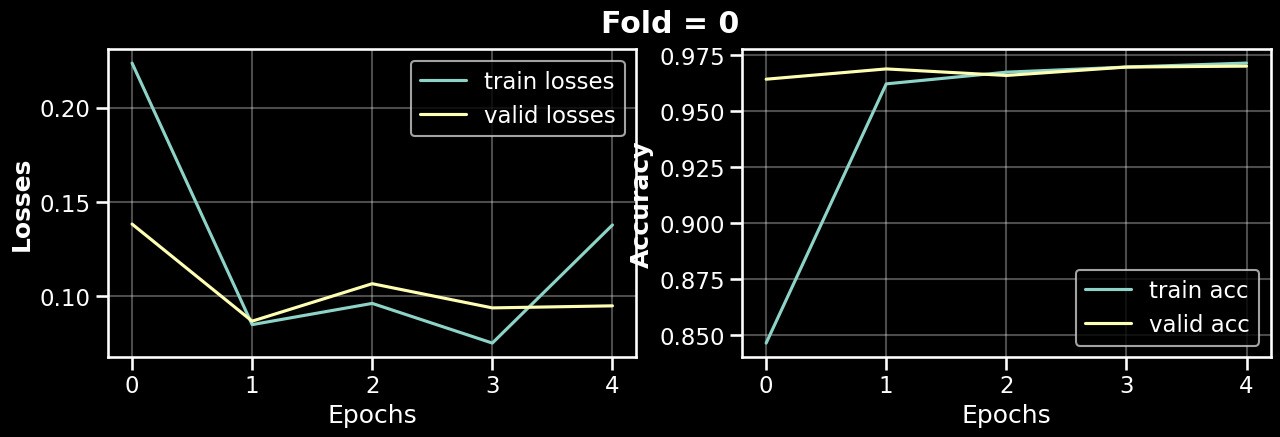

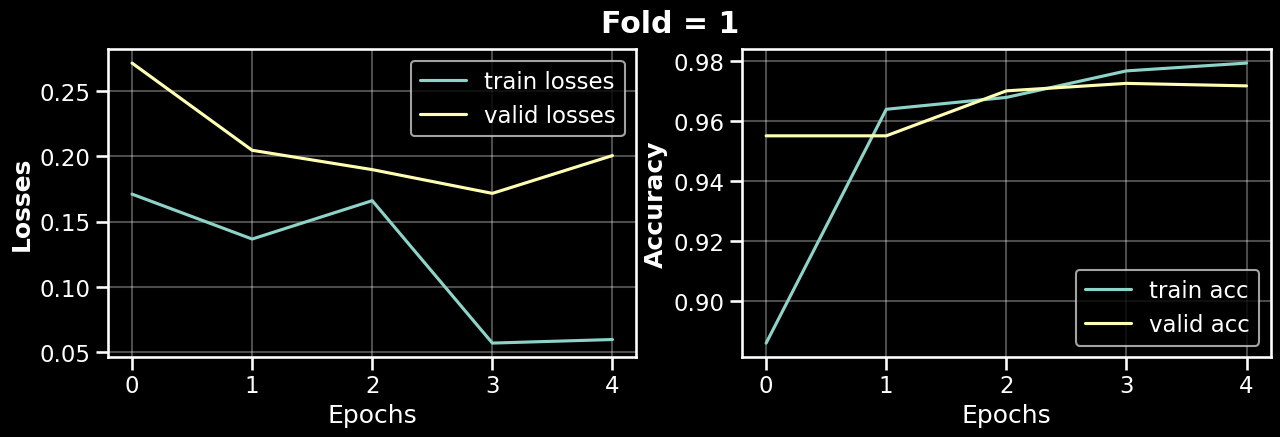

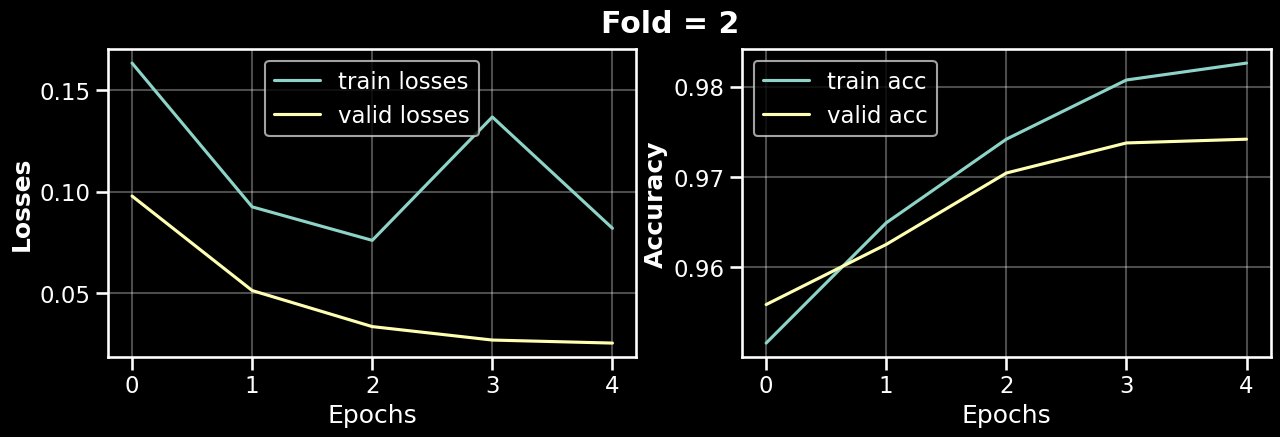

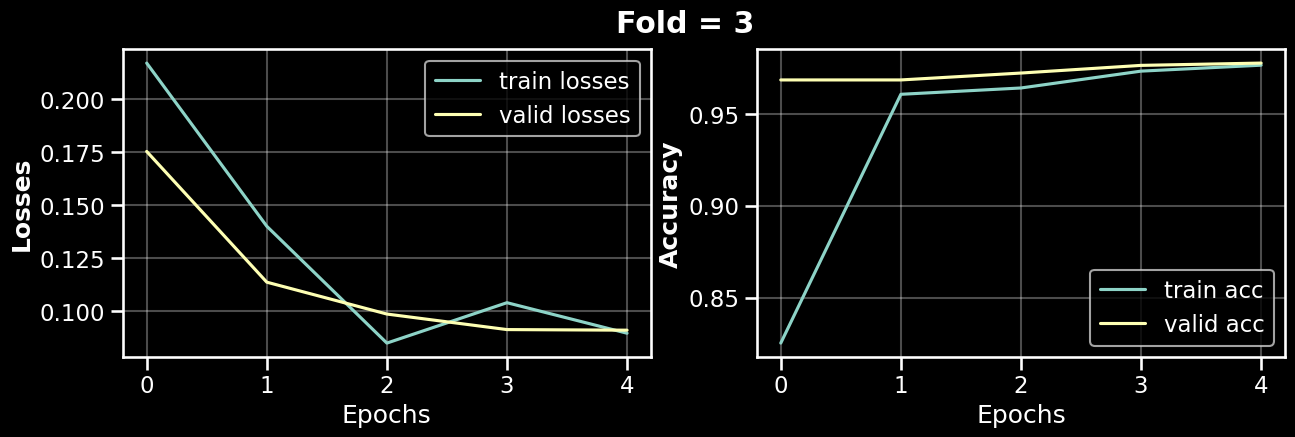

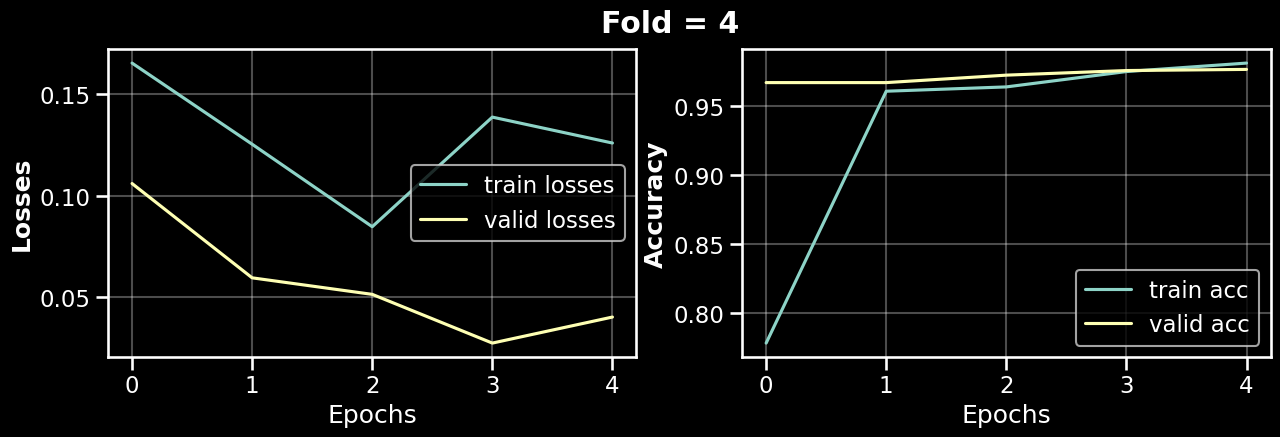

In [29]:
%%time


# mlflow.end_run()
import dagshub
import mlflow

num_workers = 4
beta1, beta2 = 0.9, 0.999
weight_decay = 2e-2
best_score = 1000

dagshub.init(repo_owner='trehansalil', repo_name='toxicity_detection', mlflow=True)

remote_server_uri = "https://dagshub.com/trehansalil/toxicity_detection.mlflow"

mlflow.start_run()
LR = 2e-5

mlflow.log_param('fold', fold)
mlflow.log_param('num_workers', num_workers)
mlflow.log_param('pin_memory', True)
mlflow.log_param('beta1', beta1)
mlflow.log_param('beta2', beta2)
mlflow.log_param('weight_decay', weight_decay)
mlflow.log_param('best_score', best_score)
mlflow.log_param('Learning_rate', LR)      
best_scores = []
for fold in tqdm(range(0,5)):
  


    # initializing the data
    p_train = train[train['kfold'] != fold].reset_index(drop = True)
    p_valid = train[train['kfold'] == fold].reset_index(drop = True)

    train_dataset = BertDataSet(p_train['clean_text'], p_train[['toxic', 'severe_toxic','obscene', 'threat', 'insult','identity_hate']])
    valid_dataset = BertDataSet(p_valid['clean_text'], p_valid[['toxic', 'severe_toxic','obscene', 'threat', 'insult','identity_hate']])

    train_dataloader = DataLoader(train_dataset, batch_size = train_batch, shuffle = True, num_workers = num_workers, pin_memory = True)
    valid_dataloader = DataLoader(valid_dataset, batch_size = valid_batch, shuffle = False, num_workers = num_workers, pin_memory = True)

    model = transformers.BertForSequenceClassification.from_pretrained("../input/bert-base-cased", num_labels = 6)
    model.to(device)

    optimizer = AdamW(model.parameters(), LR,betas = (beta1, beta2), weight_decay = weight_decay) # AdamW optimizer

    train_steps = int(len(p_train)/train_batch * epochs)
    num_steps = int(train_steps * 0.1)       

    scheduler = get_linear_schedule_with_warmup(optimizer, num_steps, train_steps)


    train_accs = []
    valid_accs = []
    train_losses = []
    valid_losses = []
    best_valid_probs = []

    print("-------------- Fold = " + str(fold) + "-------------")

    for epoch in tqdm(range(epochs)):
        print("-------------- Epoch = " + str(epoch) + "-------------")

        train_loss, train_acc = training(train_dataloader, model, optimizer, scheduler)
        valid_loss, valid_acc, valid_probs = validating(valid_dataloader, model)
        

        train_losses.append(train_loss)
        train_accs.append(train_acc)
        valid_losses.append(valid_loss)
        valid_accs.append(valid_acc)

        print('train losses: %.4f' %(train_loss), 'train accuracy: %.3f' %(train_acc))
        print('valid losses: %.4f' %(valid_loss), 'valid accuracy: %.3f' %(valid_acc))

        if (valid_loss < best_score):

            best_score = valid_loss
            print("Found an improved model! :)")

            state = {'state_dict': model.state_dict(),
                     'optimizer_dict': optimizer.state_dict(),
                     'best_score':best_score
                    }

            torch.save(state, "model" + str(fold) + ".pth")
            best_valid_prob = valid_probs
            torch.cuda.memory_summary(device = None, abbreviated = False)
        else:
            pass


    best_scores.append(best_score)
    best_valid_probs.append(best_valid_prob)

    ##Plotting the result for each fold
    x = np.arange(epochs)
    fig, ax = plt.subplots(1, 2, figsize = (15,4))
    ax[0].plot(x, train_losses)
    ax[0].plot(x, valid_losses)
    ax[0].set_ylabel('Losses', weight = 'bold')
    ax[0].set_xlabel('Epochs')
    ax[0].grid(alpha = 0.3)
    ax[0].legend(labels = ['train losses', 'valid losses'])

    ax[1].plot(x, train_accs)
    ax[1].plot(x, valid_accs)
    ax[1].set_ylabel('Accuracy', weight = 'bold')
    ax[1].set_xlabel('Epochs')
    ax[1].legend(labels = ['train acc', 'valid acc'])

    ax[1].grid(alpha = 0.3)
    fig.suptitle('Fold = '+str(fold), weight = 'bold')

mlflow.log_param('train_steps', train_steps)
mlflow.log_param('num_steps', num_steps)         
mlflow.log_param('epoch', epoch)

mlflow.log_metric('train_loss', train_loss)   
mlflow.log_metric('train_acc', train_acc) 

mlflow.log_metric('valid_loss', valid_loss)   
mlflow.log_metric('valid_acc', valid_acc)
# mlflow.pytorch.log_model(f'model_{fold}', model)

mlflow.end_run()    

In [3]:
best_scores

[0.0950949639081955,
 0.0950949639081955,
 0.030243463814258575,
 0.030243463814258575,
 0.030243463814258575]

In [30]:
print('Mean of',kfold, 'folds for best loss in', epochs, 'epochs cross-validation folds is %.4f.' %(np.mean(best_scores)))

Mean of 5 folds for best loss in 5 epochs cross-validation folds is 0.0499.


## 9. Evaluation for k-models

We use ensemble for evaluating k-models in the validation set.

In [31]:
def predicting(test_dataloader, model, pthes):
    allpreds = []

    for pth in pthes:
        state = torch.load(pth)
        model.load_state_dict(state['state_dict'])
        model.to(device)
        model.eval()
        preds = []
        with torch.no_grad():
            for a in test_dataloader:
                ids = a['ids'].to(device)
                mask = a['mask'].to(device)
                output = model(ids, mask)
                output = output['logits'].squeeze(-1)
                output_probs = torch.sigmoid(output)
                preds.append(output_probs.cpu().numpy())
            preds = np.concatenate(preds)
            allpreds.append(preds)

    return allpreds

In [32]:
pthes = [os.path.join("./",s) for s in os.listdir("./") if ".pth" in s]

In [33]:
allpreds = predicting(valid_dataloader, model, pthes)

Taking the avarage of probabilities from k-models for each sample in the validation set.

In [34]:
valid_probs = np.zeros((len(p_valid),6))
for i in range(kfold):
    valid_probs += allpreds[i]
valid_probs = valid_probs / kfold

IndexError: list index out of range

In [35]:
valid_probs = np.asarray(valid_probs).flatten()

In [36]:
#valid_probs = allpreds[0].flatten() #This line is used when trianing for one model and not k-fold model
y_valid = p_valid[['toxic', 'severe_toxic','obscene', 'threat', 'insult','identity_hate']].to_numpy().flatten()

In [37]:
fpr, tpr, _ = roc_curve(y_valid, valid_probs)
print('auc score for kfold =', kfold, 'models is: %.2f' %(auc(fpr, tpr)*100))

auc score for kfold = 5 models is: 95.57


In [38]:
from sklearn.metrics import accuracy_score

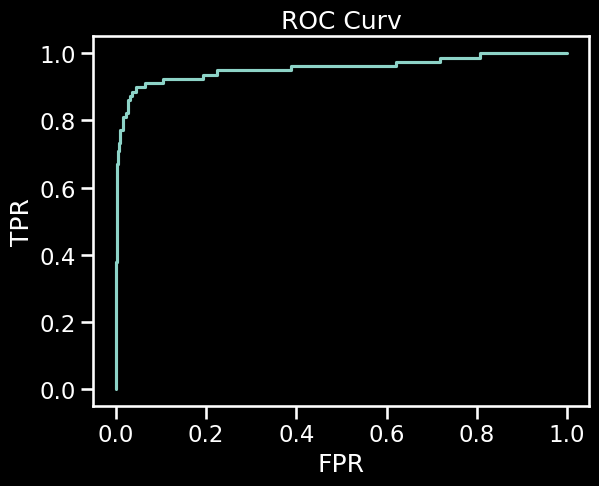

In [39]:
fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.set_title('ROC Curv')
ax.set_xlabel('FPR')
ax.set_ylabel('TPR')
plt.show()

## 10. Inference

In [40]:
class BERTinferenceDataSet(Dataset):

    def __init__(self, sentences):
        self.sentences = sentences

    def __len__(self):
        return len(self.sentences)

    def __getitem__(self, idx):
        sentence = self.sentences[idx]
        bert_sent = tokenizer.encode_plus(sentence,
                                         add_special_tokens = True, #[SEP][PAD]
                                         max_length = max_len,
                                         pad_to_max_length = True,
                                         truncation = True)

        ids = torch.tensor(bert_sent['input_ids'], dtype = torch.long)
        mask = torch.tensor(bert_sent['attention_mask'], dtype = torch.long)

        return{
            'ids' : ids,
            'mask' : mask
             }

In [42]:
test_batch = 32
test_dataset = BERTinferenceDataSet(test['clean_text'])
test_dataloader = DataLoader(test_dataset, batch_size = test_batch, shuffle = False, num_workers = 4, pin_memory = True)
pthes = [os.path.join("./",s) for s in os.listdir("./") if ".pth" in s]
pthes


['./best_model.pth', './model0.pth', './model2.pth']

In [43]:
allpreds = predicting(test_dataloader, model, pthes)

In [44]:
print('allpreds is an array with the shape of:',len(allpreds), 'x',len(allpreds[0]), 'x',len(allpreds[0][0]))
allpreds[0][0]

allpreds is an array with the shape of: 3 x 100 x 6


array([0.62012845, 0.513379  , 0.48468736, 0.26378775, 0.44749564,
       0.37589315], dtype=float32)

We take the average of the probabilities in 5 folds.

In [45]:
preds = np.zeros((len(test_dataset),6))
for i in range(kfold):
    preds += allpreds[i]
preds = preds / kfold

IndexError: list index out of range

In [46]:
results = pd.DataFrame(preds)
submission = pd.concat([test,results], axis = 1).drop(['comment_text', 'clean_text'], axis = 1)
submission.rename(columns = { 0:'toxic', 1:'severe_toxic', 2:'obscene', 3:'threat', 4:'insult', 5:'identity_hate'}, inplace = True)
submission.to_csv("submission.csv", index = False)

## 11. Summary
Here we presented a simple bert model for comment toxicity classification. A comment can be classified with multi-label and therefore this is an example of binary classification with multiple labels (not multi-classficaiton). <br>
You can run part I and part II of the notebook independantly. <br>
The best score(0.9796) achieved after running part II, with trianing the model with all the trainnig data (not reducing it to fewer rows) and having epochs = 1. The code is available in version 8. I didn't try with more epochs, because the trianing time would exceed 5h which was not the major intention with this notebook. <br>
Training the model with 2000 training samples and epochs = 5 results in a faster computation and gives the socre: 0.94311.

## 12. Useful links

[1] https://www.kaggle.com/parulpandey/eda-and-preprocessing-for-bert <br>
[2] http://jalammar.github.io/illustrated-bert/ <br>
[3] https://curiousily.com/posts/sentiment-analysis-with-bert-and-hugging-face-using-pytorch-and-python/ <br>
[4] http://jalammar.github.io/a-visual-guide-to-using-bert-for-the-first-time/ <br>
[5] https://iq.opengenus.org/native-language-identification-dl/